# Lecture 4 -- Least Squares Classification


In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate training data

In [2]:
n = 2000
p = 2
X = np.random.rand(n, p)
vX = np.vander(X[:, 0] - 0.5, N=4, increasing=True)
y = 2 * ((X[:, 1] > np.dot(vX, [0.5, 0, 0, 3]) * 1.1)) - 1

### Least squares estimate

In [3]:
w = la.inv(X.T@X)@X.T@y

yhat_real = X@w
yhat_sign = np.sign(yhat_real)

### Plot results

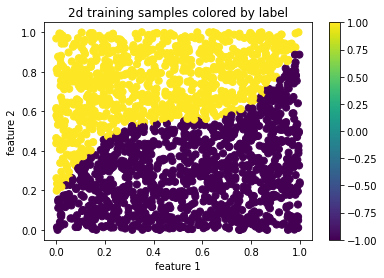

In [4]:
plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], 50, c=y)
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('2d training samples colored by label')
plt.show()

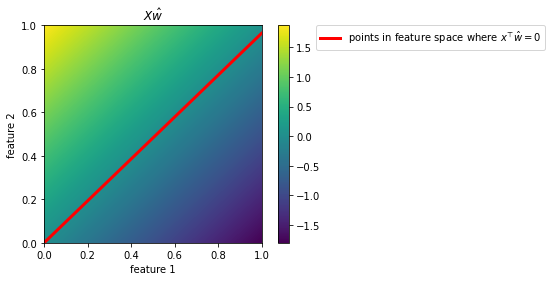

In [5]:
xgrid, ygrid = np.meshgrid(np.linspace(0, 1, 500), np.linspace(0, 1, 500))
yhat_real_grid = w[0]*xgrid +  w[1]*ygrid

plt.figure(2)
plt.imshow(yhat_real_grid, extent=[0, 1, 0, 1], origin='lower')
plt.colorbar()
x = np.linspace(0, 1, 500)
plt.plot(x, -x*w[0]/w[1], 'r', linewidth=3,label=r'points in feature space where $x^\top \hat w = 0$')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title(r'$X\hat{w}$')
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.)
plt.show()

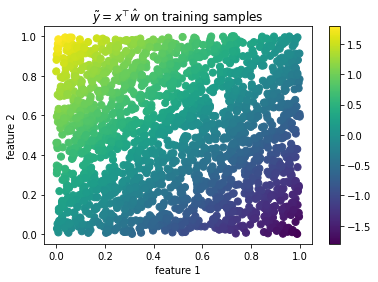

In [6]:
plt.figure(3)
plt.scatter(X[:, 0], X[:, 1], 50, c=yhat_real)
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title(r'$\tilde{y} = x^\top \hat w$ on training samples')
plt.show()

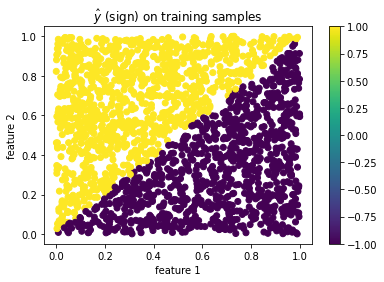

In [7]:
plt.figure(4)
plt.scatter(X[:, 0], X[:, 1], c=yhat_sign)
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title(r'$\hat{y}$ (sign) on training samples')
plt.show()

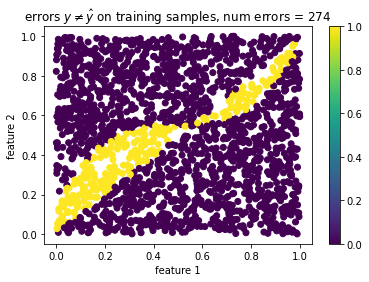

In [8]:
plt.figure(5)
errors = yhat_sign != y
plt.scatter(X[:, 0], X[:, 1], c=errors)
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title(r'errors $y\neq \hat{y}$ on training samples, num errors = ' + str(sum(abs(errors))))
plt.show()

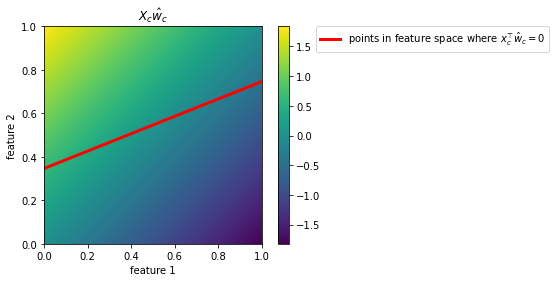

In [9]:
# allow least-squares to use a constant offset
# instead of predicting y ~ x_0 w_0 + x_1 w_1, instead we'll have y ~ x_0 w_0 + x_1 w_1 + w_2 * 1

Xc = np.concatenate((X, np.ones((n, 1))), axis=1)
wc = la.inv(Xc.T@Xc)@Xc.T@y

yhat_signc = np.sign(Xc@wc)

yhat_real_gridc = wc[0]*xgrid + wc[1]*ygrid + wc[2]
plt.figure(12)
plt.imshow(yhat_real_grid, extent=[0, 1, 0, 1], origin='lower')
plt.colorbar()

x = np.linspace(0, 1, 500)
plt.plot(x, -(x*wc[0] + wc[2])/wc[1], 'r', linewidth=3,label=r'points in feature space where $x_c^\top \hat w_c = 0$')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title(r'$X_c\hat{w}_c$')
plt.legend(bbox_to_anchor=(1.25, 1), loc=2, borderaxespad=0.)
plt.show()

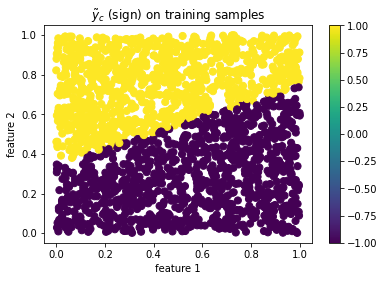

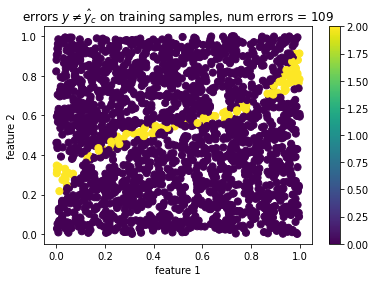

In [10]:
plt.figure(14)
plt.scatter(X[:, 0], X[:, 1], 50, c=yhat_signc)
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title(r'$\tilde{y}_c$ (sign) on training samples')
plt.show()

plt.figure(15)
errors = np.abs(yhat_signc - y)
plt.scatter(X[:, 0], X[:, 1], 50, c=errors)
plt.colorbar()
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title(r'errors $y \neq \hat{y}_c$ on training samples, num errors = ' + str(sum(abs(yhat_signc != y))))
plt.show()

[-1. -1. -1. ... -1. -1. -1.]


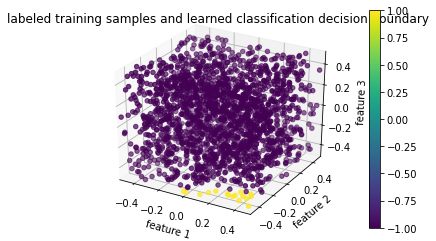

In [11]:
### now with a 3D feature space

%matplotlib inline


n = 2000
p = 3
X = np.random.rand(n, p) - 0.5
wtrue =  np.random.rand(p+1) - 0.5
Xc = np.hstack((X, np.ones((n, 1))))
y = np.sign(Xc@wtrue)
print(y)

what = la.inv(Xc.T@Xc)@Xc.T@y

yhat_real = Xc@what
yhat_sign = np.sign(yhat_real)

fig = plt.figure(21)
ax = fig.add_subplot(111, projection="3d")
p = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
fig.colorbar(p)

# plot decision boundary plane
xgrid, ygrid = np.meshgrid(np.linspace(-0.5, 0.5, 100), np.linspace(-0.5, 0.5, 100))
z = -(what[3] + what[0]*xgrid + what[1]*ygrid) / what[2]
ax.plot_surface(xgrid, ygrid, z, alpha=0.5)

ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-0.5, 0.5)
ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2")
ax.set_zlabel("feature 3")
plt.title('labeled training samples and learned classification decision boundary')
plt.show()

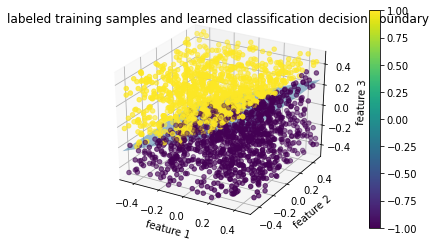

In [12]:
### 3D features, nonlinear true labels

%matplotlib inline

n = 2000
p = 3
X = np.random.rand(n, p) - 0.5
Xc = np.hstack((X, np.ones((n, 1))))
y = np.sign(X[:, 2] - (0.8 * (X[:, 0] + 0.5))**2 + 0.2)

what = la.inv(Xc.T@Xc)@Xc.T@y

yhat_real = Xc@what
yhat_sign = np.sign(yhat_real)

fig = plt.figure(22)
ax = fig.add_subplot(111, projection="3d")
p = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
fig.colorbar(p)

# plot decision boundary plane
xgrid, ygrid = np.meshgrid(np.linspace(-0.5, 0.5, 100), np.linspace(-0.5, 0.5, 100))
z = -(what[3] + what[0]*xgrid + what[1]*ygrid) / what[2]
ax.plot_surface(xgrid, ygrid, z, alpha=0.5)

ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_zlim(-0.5, 0.5)
ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2")
ax.set_zlabel("feature 3")
plt.title('labeled training samples and learned classification decision boundary')
plt.show()